In [19]:
# Use ! to run a terminal command

! pip3 install wavio 
! pip3 install librosa
! pip3 install sounddevice
! pip3 install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ce/25/a557ee10ac9dce1300850024707ce1850a6958f1673a9194be878b99d631/matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler

In [21]:
# import necessary modules
import sounddevice as sd
from scipy.io.wavfile import write
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [ ]:
# Define Sampling Rate or Frequency in Hz
sr = 44100

# Record duration in seconds
duration = 5

In [ ]:
# Start audio recording
recording = sd.rec(int(duration*sr), samplerate=sr, channels=2) # we will record with a  mono or stereo channel microphone

# Record audio for the given duration
print("recording...............")
sd.wait()

# Write it to a file
write("sound.wav",sr,recording)

recording...............


In [ ]:
# Look at the discrete number array we got from the audio
x, sr = librosa.load('sound.wav')
print("recording shape", x.shape)
print("sampling rate", sr)

recording shape (110250,)
sampling rate 22050


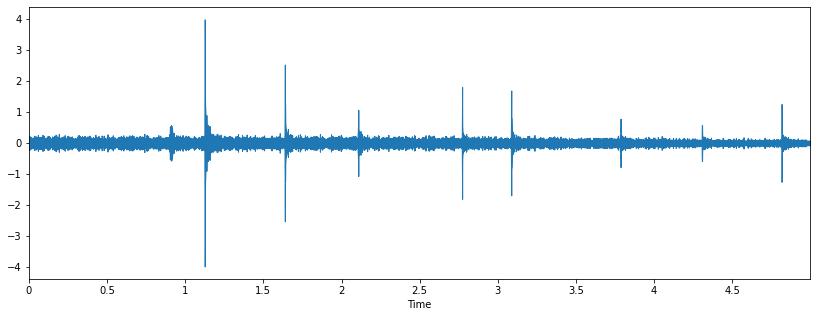

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
# Play the audio
ipd.Audio(x, rate=sr) # load a NumPy array

In [22]:
# Set the time difference to take picture of
# the the generated signal.
Time_difference = 0.0001

# Generating an array of values
#Time_Array = np.linspace(0, 5, math.ceil(5 / Time_difference))

# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * x))

# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(Data, Fs=6, cmap="rainbow")

# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.show()


NameError: name 'x' is not defined